In [ ]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ===================== 1. Load and Explore Dataset ===================== #
# Load the dataset into a DataFrame
file_path = "Ev Sales.csv"  # Replace with your dataset path
ev_sales = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(ev_sales.head())

# Check for missing values
print("\nMissing Values in Dataset:")
print(ev_sales.isnull().sum())

# Display basic information about the dataset
print("\nDataset Info:")
print(ev_sales.info())

# Display basic descriptive statistics
print("\nBasic Descriptive Statistics:")
print(ev_sales.describe())

Dataset Preview:
     YEAR  2 W   3 W  4 W  BUS  TOTAL
0  Apr-17   96  4748  198    0   5042
1  May-17   91  6720  215    2   7028
2  Jun-17  137  7178  149    1   7465
3  Jul-17  116  8775  120    0   9011
4  Aug-17   99  8905  137    0   9141

Missing Values in Dataset:
YEAR     0
2 W      0
3 W      0
4 W      0
BUS      0
TOTAL    0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YEAR    74 non-null     object
 1   2 W     74 non-null     int64 
 2   3 W     74 non-null     int64 
 3   4 W     74 non-null     int64 
 4   BUS     74 non-null     int64 
 5   TOTAL   74 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.6+ KB
None

Basic Descriptive Statistics:
                 2 W           3 W          4 W         BUS          TOTAL
count      74.000000     74.000000    74.000000   74.000000      74.000000
mean   

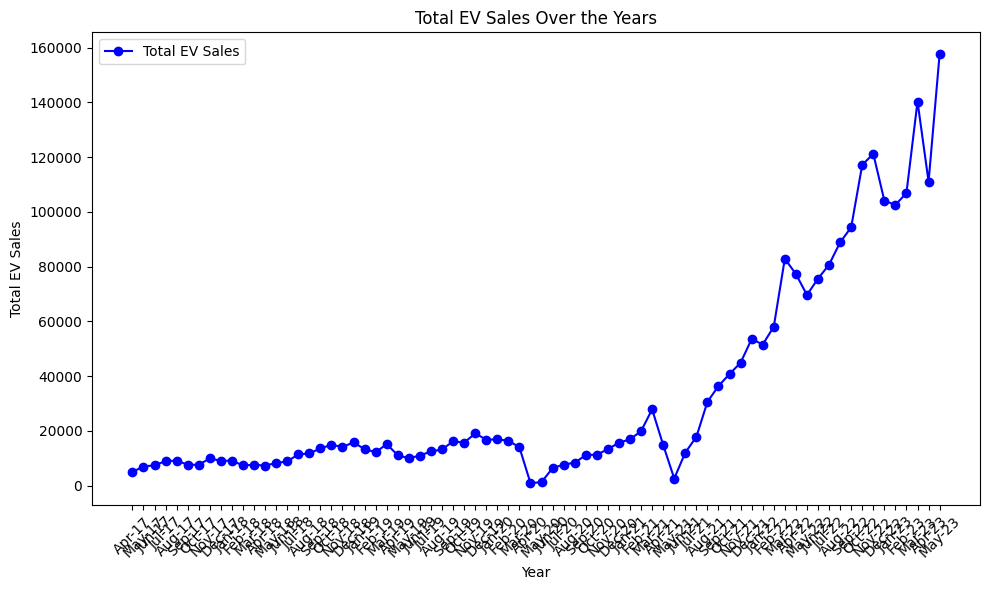

In [ ]:

# ===================== 2. Total EV Sales Over Time ===================== #
# Visualize Total EV Sales over time
plt.figure(figsize=(10, 6))
plt.plot(ev_sales['YEAR'], ev_sales['TOTAL'], marker='o', color='b', label="Total EV Sales")
plt.xticks(rotation=45)  # Rotate year labels for better visibility
plt.title('Total EV Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.legend()
plt.tight_layout()
plt.show()

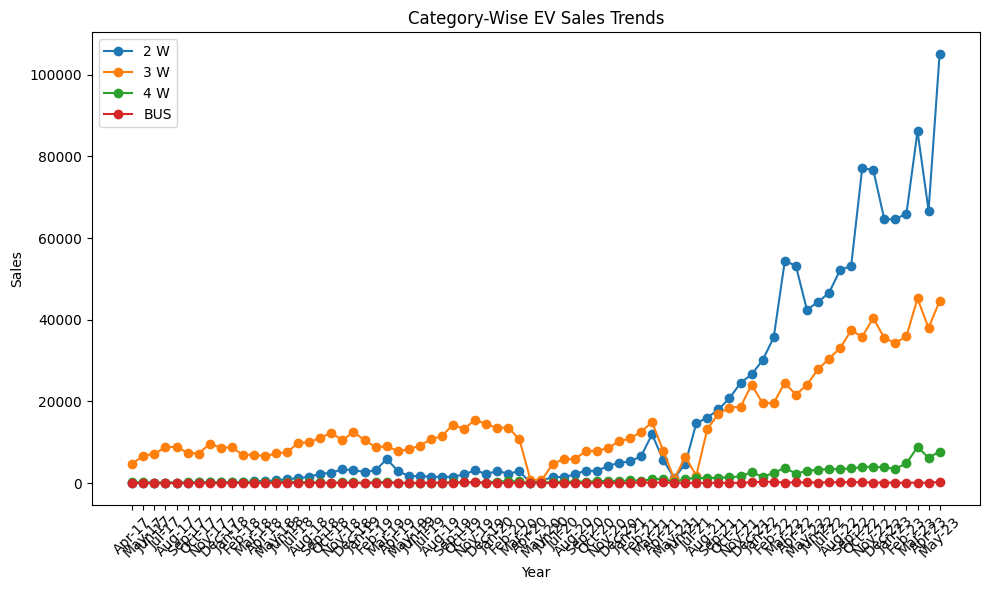

In [ ]:
# ===================== 3. Category-Wise Sales Trends ===================== #
# Line plots for each EV category over time
categories = ['2 W', '3 W', '4 W', 'BUS']

# Create separate line plots for each category
plt.figure(figsize=(10, 6))
for category in categories:
    plt.plot(ev_sales['YEAR'], ev_sales[category], marker='o', label=category)

plt.xticks(rotation=45)
plt.title('Category-Wise EV Sales Trends')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

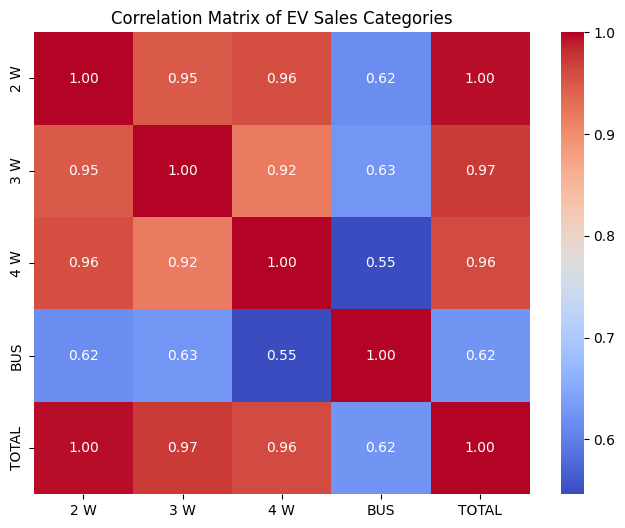

In [ ]:
# ===================== 4. Correlation Analysis ===================== #
# Compute and visualize the correlation matrix
correlation_matrix = ev_sales[['2 W', '3 W', '4 W', 'BUS', 'TOTAL']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of EV Sales Categories")
plt.show()

In [ ]:
# ===================== 5. Yearly Growth Calculation ===================== #
# Add a new column for yearly growth percentage
ev_sales['Yearly Growth (%)'] = ev_sales['TOTAL'].pct_change() * 100

# Display the Yearly Growth
print("\nYearly Growth Percentage:")
print(ev_sales[['YEAR', 'TOTAL', 'Yearly Growth (%)']])


Yearly Growth Percentage:
      YEAR   TOTAL  Yearly Growth (%)
0   Apr-17    5042                NaN
1   May-17    7028          39.389131
2   Jun-17    7465           6.217985
3   Jul-17    9011          20.709980
4   Aug-17    9141           1.442681
..     ...     ...                ...
69  Jan-23  102545          -1.559950
70  Feb-23  106977           4.322005
71  Mar-23  140360          31.205773
72  Apr-23  111048         -20.883443
73  May-23  157788          42.089907

[74 rows x 3 columns]


In [ ]:
# ===================== 6. Top 5 Years with Highest Sales ===================== #
# Find the top 5 years with the highest total sales
top_5_years = ev_sales.nlargest(5, 'TOTAL')

print("\nTop 5 Years with Highest Total EV Sales:")
print(top_5_years[['YEAR', 'TOTAL']])


Top 5 Years with Highest Total EV Sales:
      YEAR   TOTAL
73  May-23  157788
71  Mar-23  140360
67  Nov-22  121248
66  Oct-22  117219
72  Apr-23  111048


In [ ]:
# ===================== 7. Insights ===================== #
# Print Key Insights
print("\nKey Insights:")
print(f"- Total Years in Dataset: {ev_sales['YEAR'].nunique()}")
print(f"- Average Total EV Sales: {ev_sales['TOTAL'].mean():.2f}")
print(f"- Highest Sales Year: {top_5_years.iloc[0]['YEAR']} with {top_5_years.iloc[0]['TOTAL']} sales.")
print(f"- Correlation Insights:\n{correlation_matrix}")


Key Insights:
- Total Years in Dataset: 74
- Average Total EV Sales: 33144.96
- Highest Sales Year: May-23 with 157788 sales.
- Correlation Insights:
            2 W       3 W       4 W       BUS     TOTAL
2 W    1.000000  0.946865  0.957640  0.615954  0.995435
3 W    0.946865  1.000000  0.918034  0.627012  0.972932
4 W    0.957640  0.918034  1.000000  0.545935  0.960412
BUS    0.615954  0.627012  0.545935  1.000000  0.624915
TOTAL  0.995435  0.972932  0.960412  0.624915  1.000000
